<h1><center><font color=blue>Project - Applied Statistics</center></h1>
<h1><center><font color=red>Submitted by: Visakh.V</center></h1>

### <font color=red>1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sci
from scipy import stats
from scipy.stats import skew
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols # statsmodels.formula.api.ols creates a model from a formula and dataframe
from statsmodels.stats.anova import anova_lm # statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

### <font color=red>2. Read the data as a data frame

In [2]:
dat = pd.read_csv('insurance.csv')

In [3]:
dat.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### <font color=red>3. Perform basic EDA

#### a. Shape of the data

In [4]:
dat.shape

(1338, 7)

There are 1338 total records and 7 columns

#### b. Data type of each attribute

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


There are 3 Categorical variables (sex,smoker and region) and 4 Continuous variables (age,bmi,children and charges)

#### c. Checking the presence of missing values

In [6]:
dat.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no "NaN" in the data.

#### d. 5 point summary of numerical attributes

In [7]:
dat.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


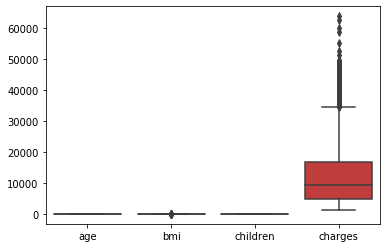

In [8]:
sns.boxplot(data=dat)

#### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

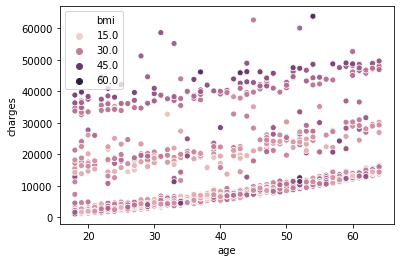

In [9]:
sns.scatterplot(x=dat["age"],y=dat["charges"],hue=dat["bmi"])

#### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns

In [10]:
skew_dat = dat[['bmi','age','charges']]
skew_dat.skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

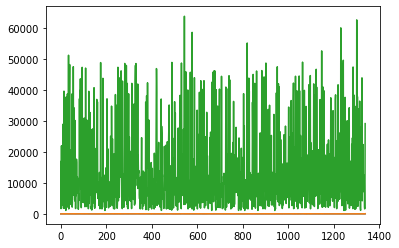

In [11]:
plt.plot(skew_dat)

#### g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns

In [12]:
z = stats.zscore(skew_dat)
print(np.where(z>3)) # Let threshold be set as 3

# Eg: dat.values[1300][2] is an oulier whose z value is 4.07 > Threshold 3
print(z[1300][2])

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
      dtype=int64), array([2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0], dtype=int64))
4.074388669634486


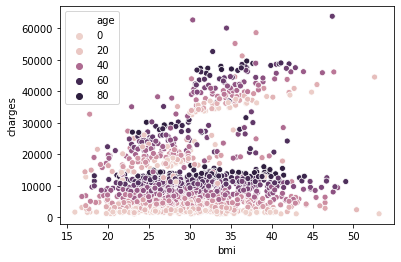

In [13]:
sns.scatterplot(x="bmi", y="charges",data=dat,hue="age")

#### h. Distribution of categorical columns (include  children) 

In [14]:
cat = dat.select_dtypes(include="object").columns

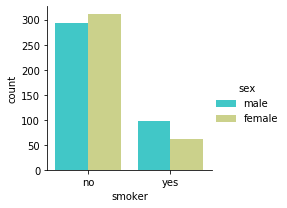

In [15]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex", data=dat[(dat.children > 0)], height = 3)

#### i. Pair plot that includes all the columns of the data frame

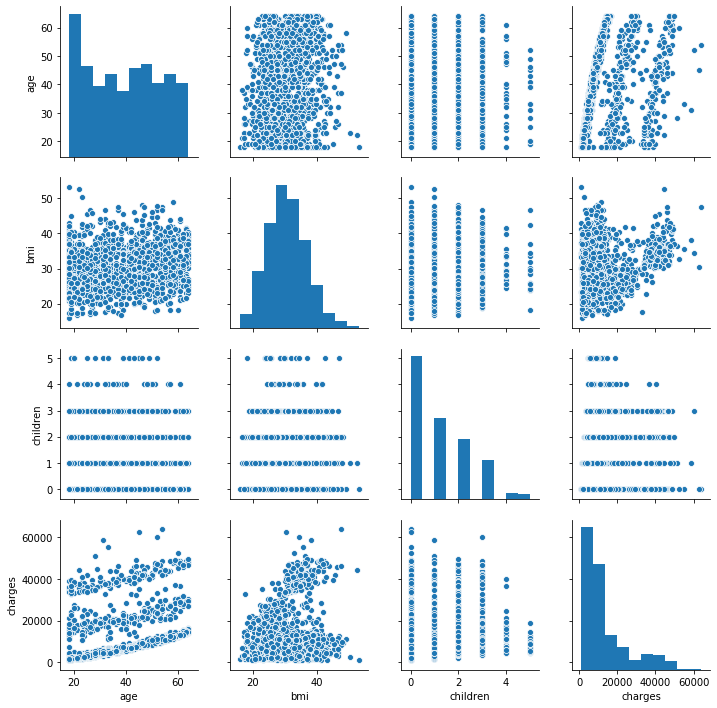

In [16]:
sns.pairplot(dat)

### <font color=red>4. Answer the following questions with statistical evidence

#### <font color=red>a. Do charges of people who smoke differ significantly  from the people who don't? 

In [17]:
dat['smoker_n']=(dat['smoker']=="yes").astype(int)
dat.corr()

,age,bmi,children,charges,smoker_n
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_n,-0.025019,0.003750,0.007673,0.787251,1.000000


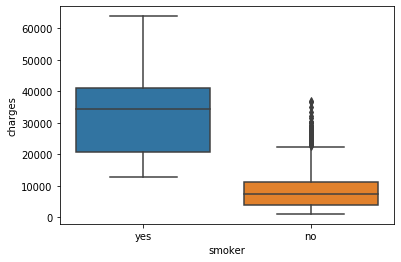

In [18]:
sns.boxplot(x="smoker", y="charges", data=dat)

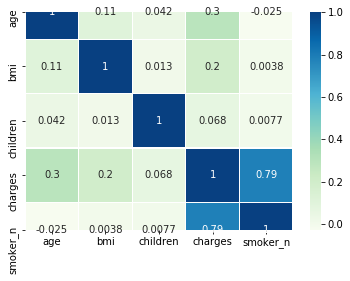

In [19]:
sns.heatmap(dat.corr(),cmap="GnBu",annot=True,linewidths=0.1)

#### Ans: Here we can see that correlation between smokers and charges is 0.787251 and from box plot and heatmap it is clear that charges for people who smoke is at higher side.

#### <font color=red>b. Does bmi of males differ significantly from that of  females?  

In [20]:
dat['sex_n']=(dat['sex']=="male").astype(int)
dat.corr()

,age,bmi,children,charges,smoker_n,sex_n
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292
smoker_n,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185
sex_n,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000


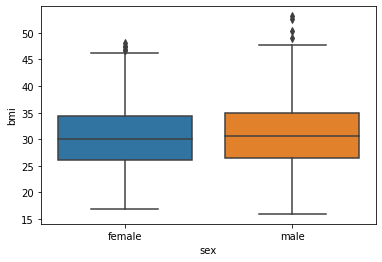

In [21]:
sns.boxplot(x="sex", y="bmi", data=dat)

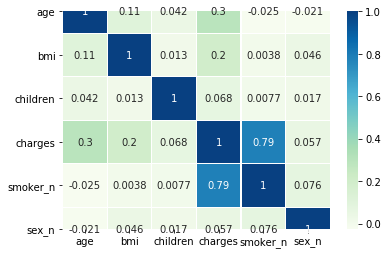

In [22]:
sns.heatmap(dat.corr(),cmap="GnBu",annot=True,linewidths=0.1)

#### Ans: There is no significant change between bmi and sex as correlation is less 0.046371. Also it is clear from the box plot and heatmap.

#### <font color=red>c. Is the proportion of smokers significantly different  in different genders?

In [23]:
female_smokers = dat[dat['sex'] == 'female'].smoker.value_counts()[1]
male_smokers = dat[dat['sex'] == 'male'].smoker.value_counts()[1]
n_females = dat.sex.value_counts()[1]
n_males = dat.sex.value_counts()[0]
p_females = female_smokers/n_females
p_males = male_smokers/n_males

from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

print(f'p-value = {pval}')

p-value = 0.005324114164320532


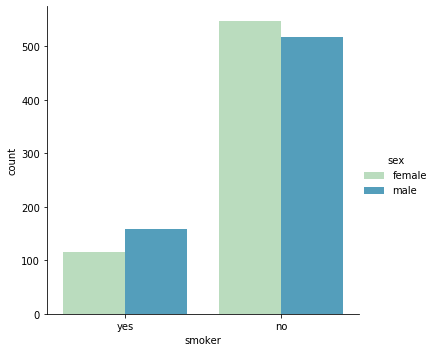

In [24]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="GnBu", data=dat)

#### Ans: With a p-value of 0.0053, the proportion of smokers is significantly different. From catplot also it is visible.

#### <font color=red>d. Is the distribution of bmi across women with no  children, one child and two children, the same ?

#### Ans: Let Null Hypothesis & Alternative Hypothesis be

$H_0$: $\mu1$ = $\mu2$ = $\mu3$

$H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean "bmi" of women with no children, one child and two children respectively

Significance Level be α = 0.05

Analysis of variance (ANOVA) can be used to determine whether the means of three or more groups are different, which uses F-tests to statistically test the equality of means.

In [25]:
dat.loc[(dat['sex']=='female') & (dat['children']==0), 'Women'] = "no children"
dat.loc[(dat['sex']=='female') & (dat['children']==1), 'Women'] = "one child"
dat.loc[(dat['sex']=='female') & (dat['children']==2), 'Women'] = "two children"

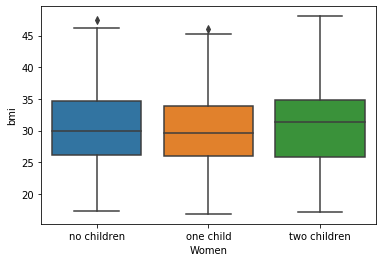

In [26]:
sns.boxplot(x="Women", y="bmi", data=dat)

In [27]:
mod = ols('bmi~Women',data=dat).fit()
aov_table = anova_lm(mod,type=2)
print(aov_table)

             df        sum_sq    mean_sq         F    PR(>F)
Women       2.0     24.590123  12.295062  0.334472  0.715858
Residual  563.0  20695.661583  36.759612       NaN       NaN


#### Conclusion: Since p value is 0.7158 and it is less than our chosen level of signifance at 5%, the statistical decision is to reject the null hypothesis. i.e., distribution of bmi across women with no children, one child and two children are not the same.